# Heart Disease Analysis

# Task
- Data Preparation / Cleaning
- EDA
- Compare two different variables and provide short analysis (ex: gender and sex, gender and cp, cp and chol, etc.)
- Create model for analysis (Classification). Use XGBoost, K-Nearest Neighbor, Logistic Regression, Gaussian Naive Bayes, Bernoulli Naive Bayes, Support Vector Machine, Random Forest.
- Create short conclusion about the modeling results

In [202]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

In [159]:
url = "heart.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Preparation / Cleaning

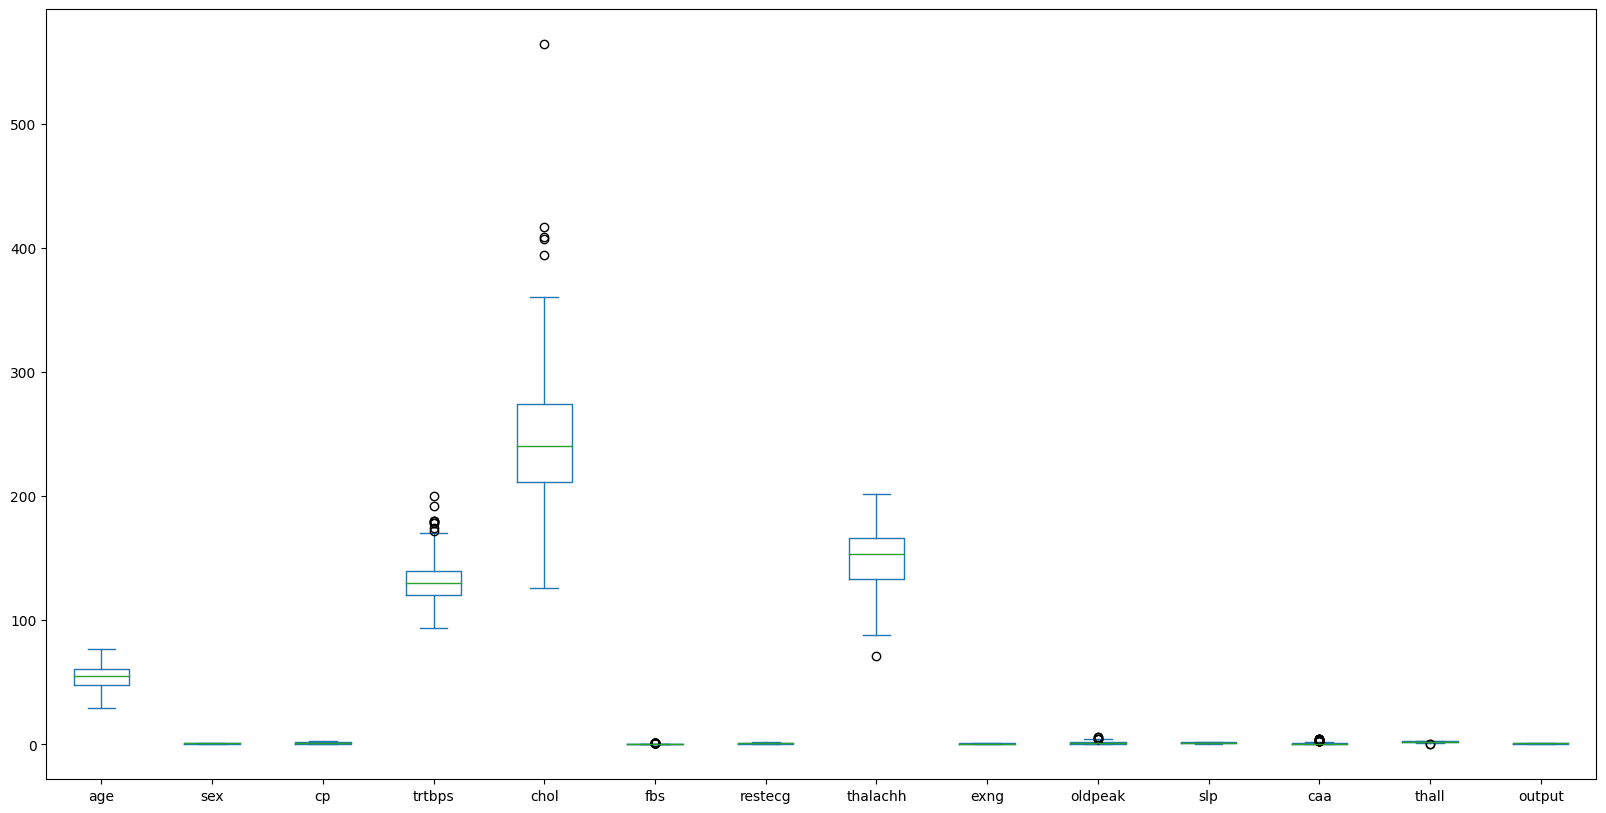

In [160]:
#Check outliers
df.plot(kind='box', figsize=(20, 10))
plt.show()

In [161]:
#checking null for each column
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [162]:
#Check dupe
df.duplicated().sum()

1

In [163]:
#Drop dupe
df.drop_duplicates(inplace=True)

In [172]:
label_mapping = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
}

# Create a new column with custom labels
df['Chest Pain Type'] = df['cp'].map(label_mapping)

# EDA

In [164]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


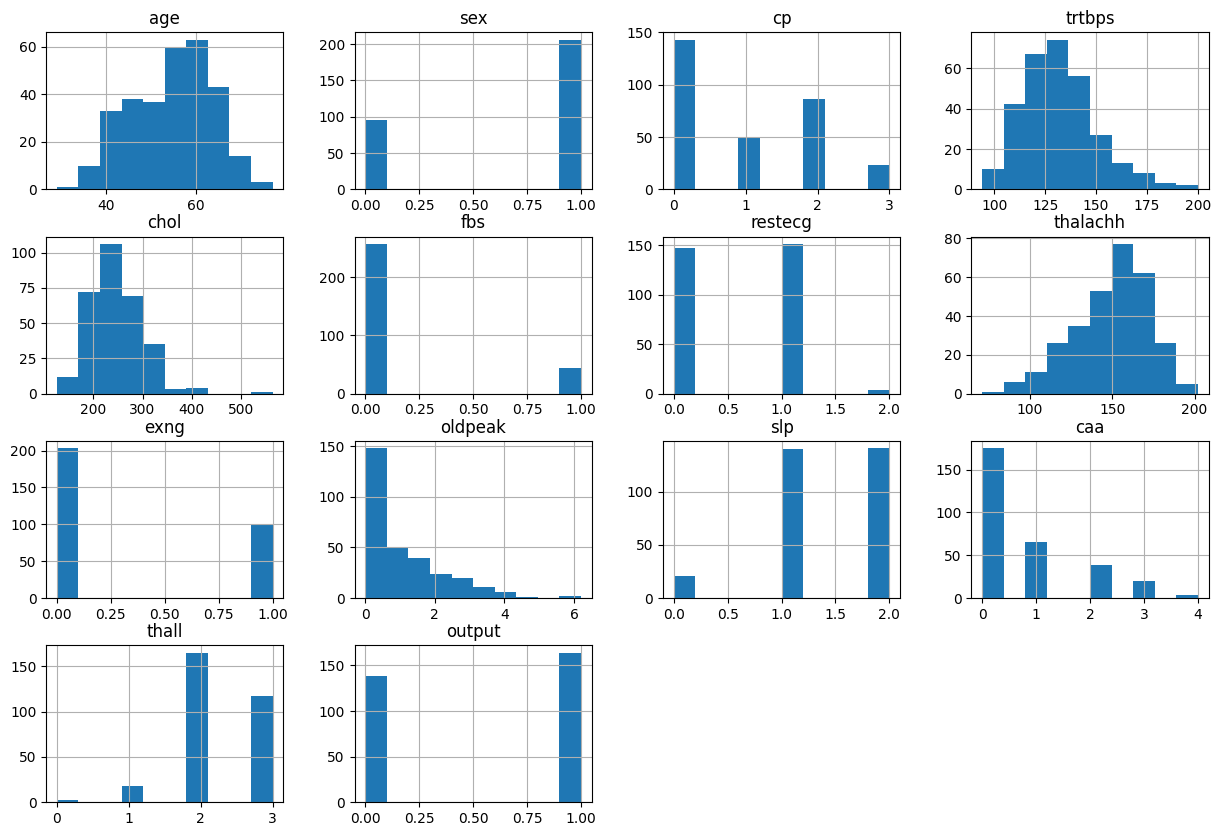

In [166]:
df.hist(bins=10, figsize=(15, 10))
plt.show()

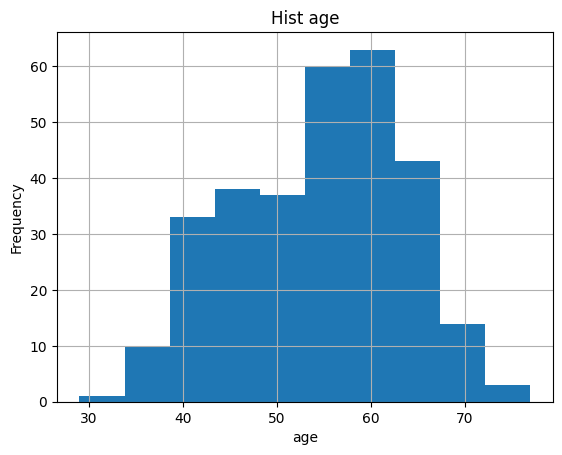

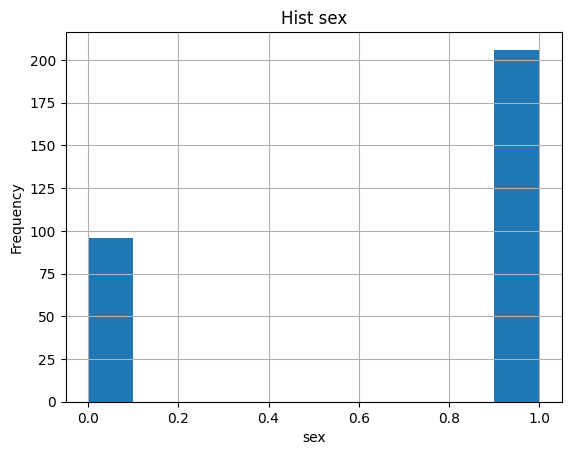

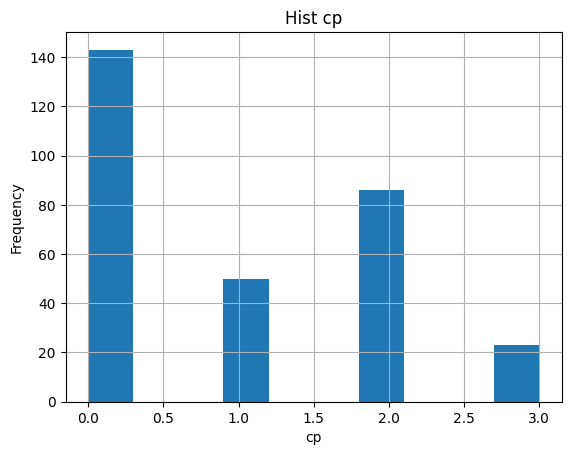

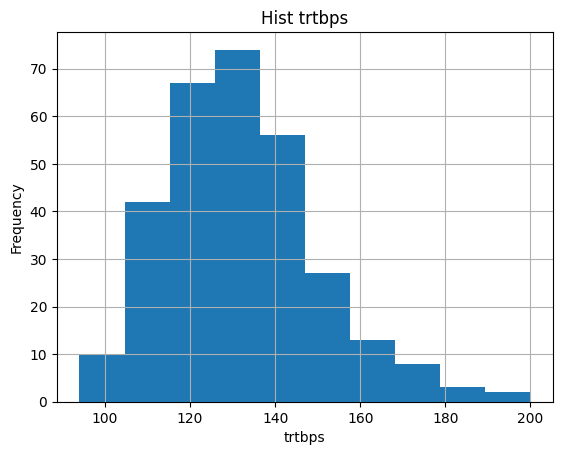

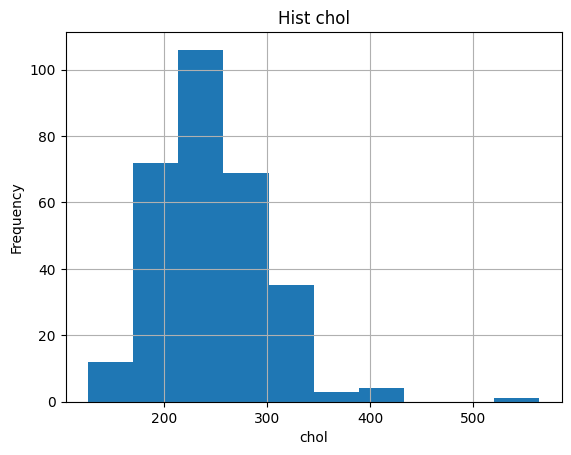

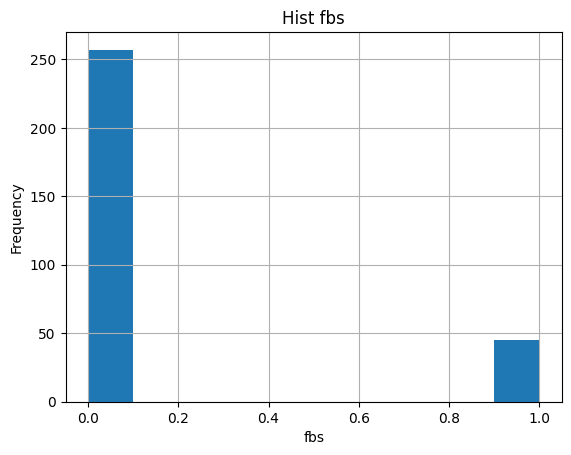

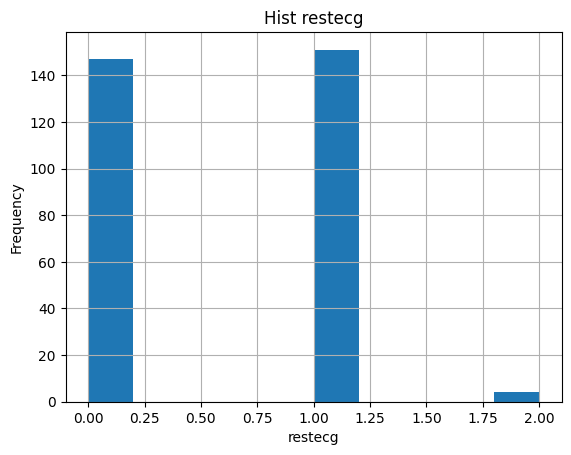

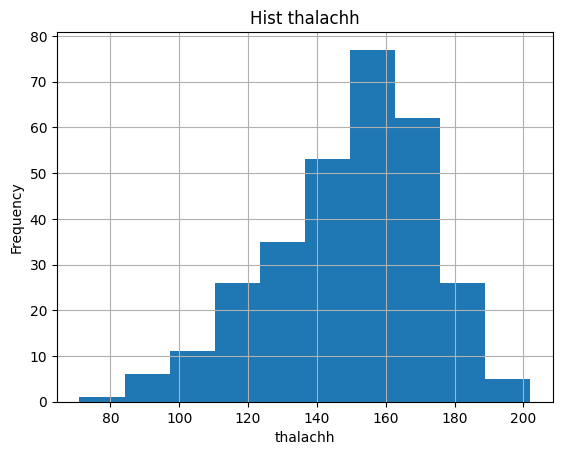

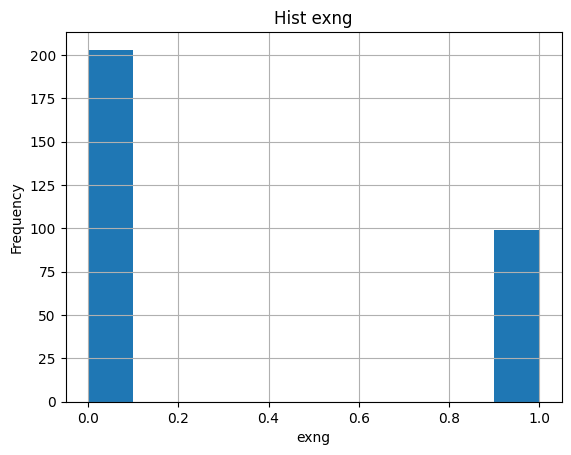

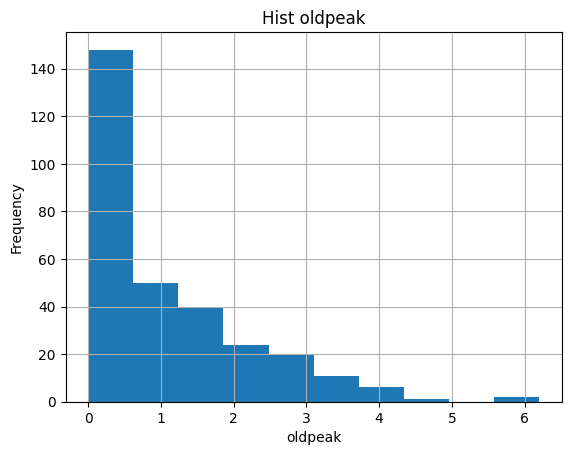

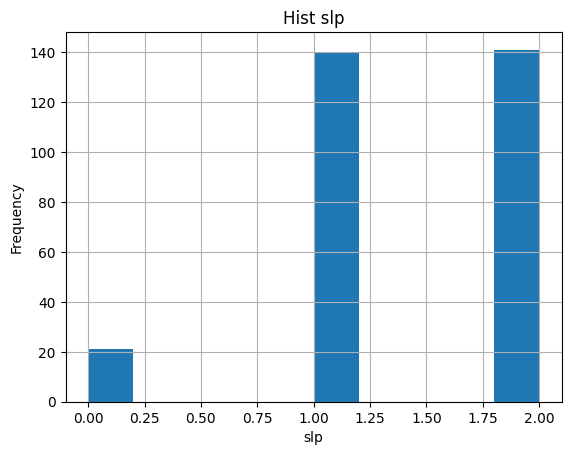

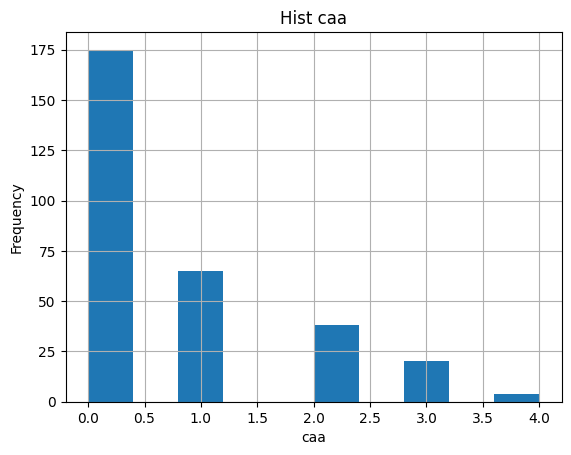

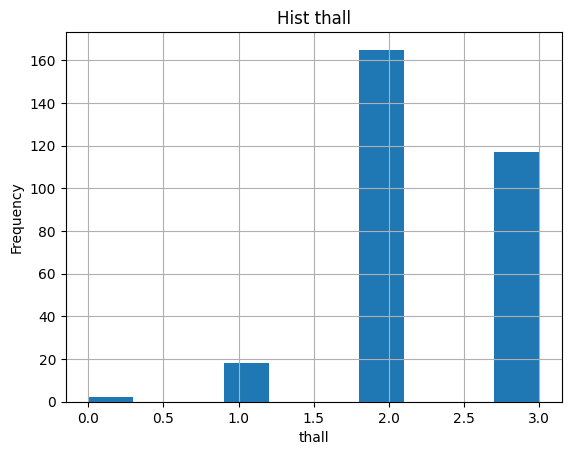

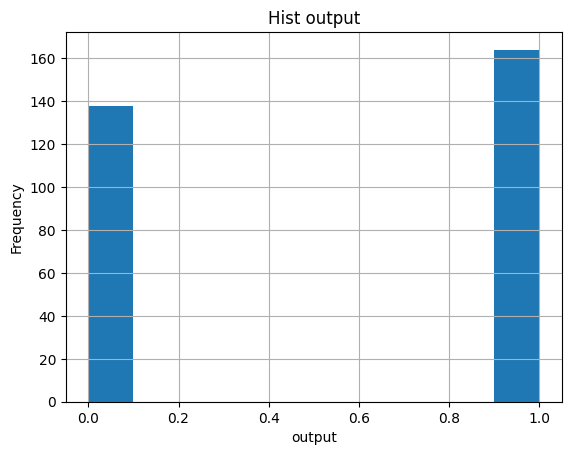

In [167]:
for feature in df:
    df[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Hist {feature}')
    plt.show()

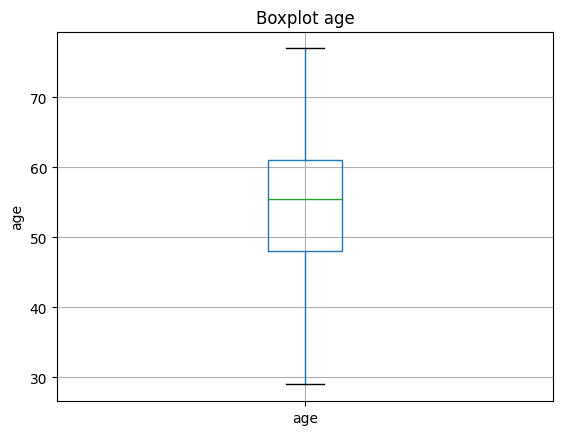

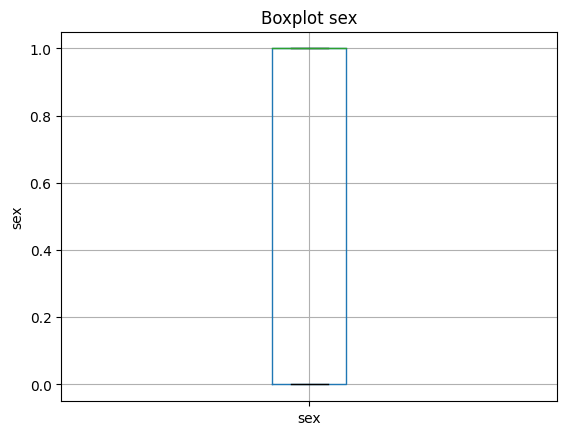

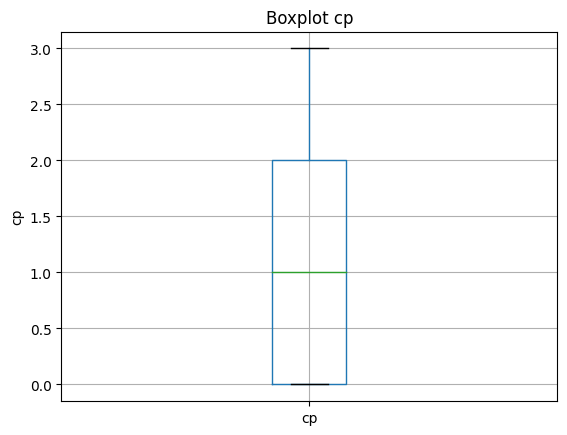

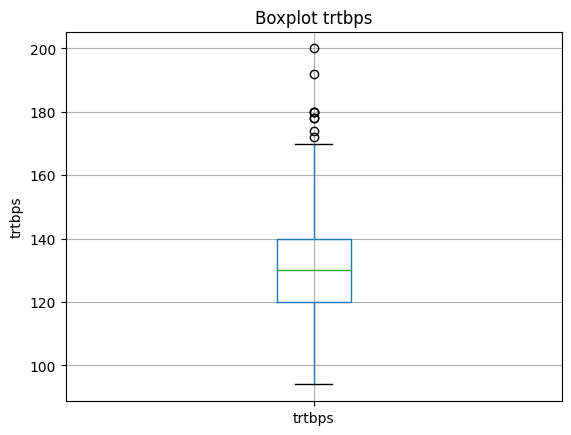

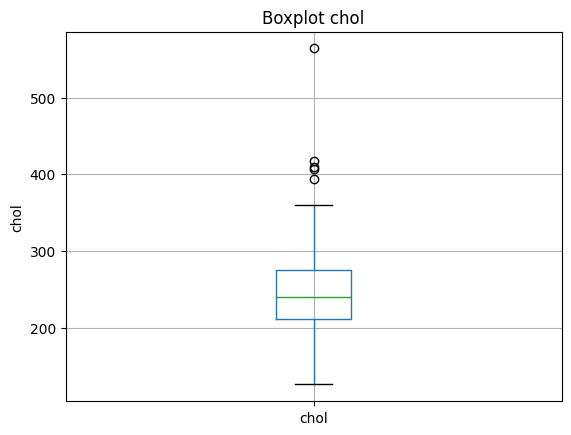

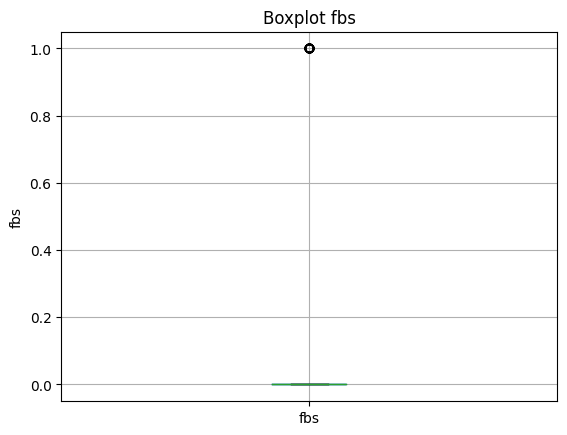

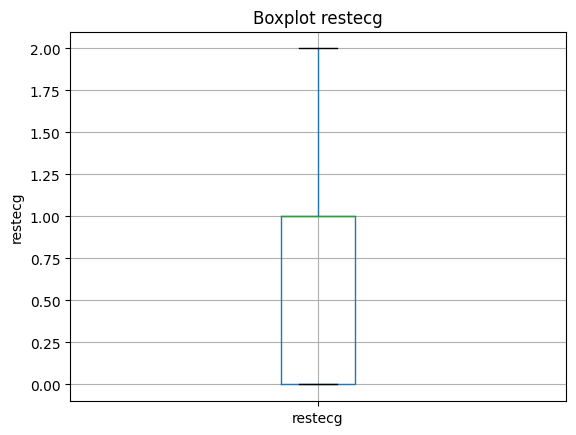

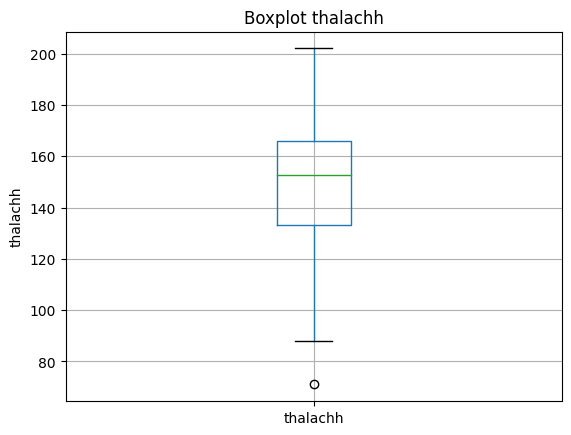

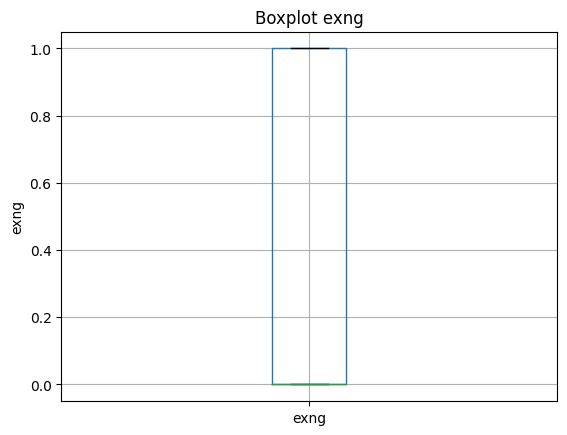

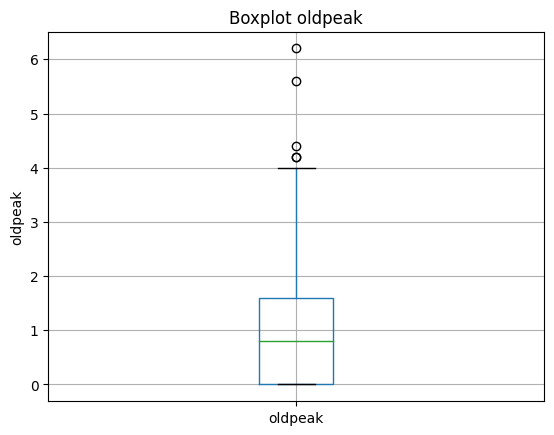

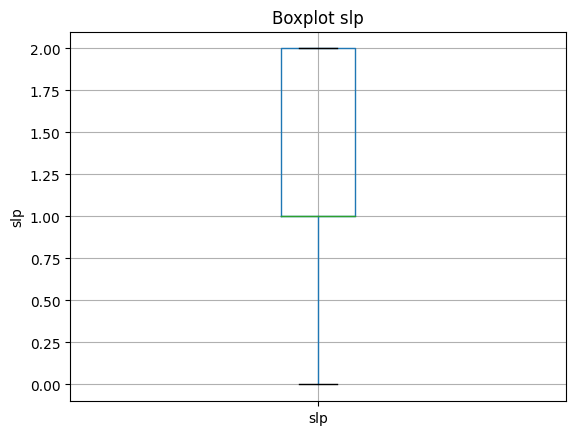

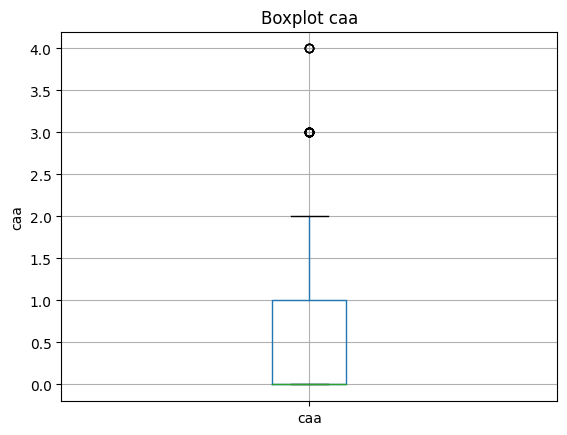

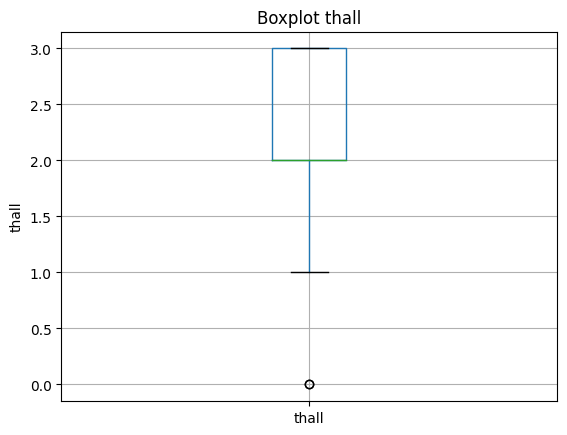

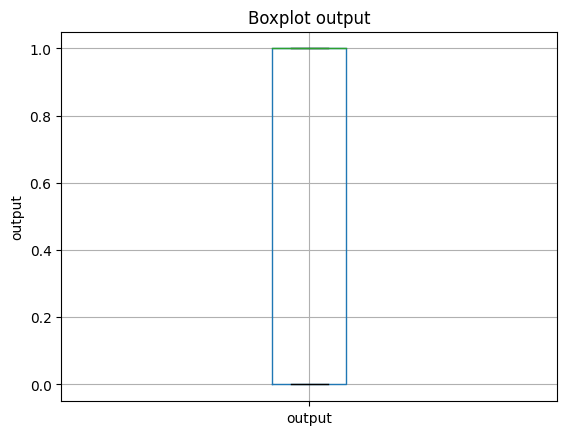

In [168]:
for feature in df:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(f'Boxplot {feature}')
    plt.show()

<Figure size 1500x800 with 0 Axes>

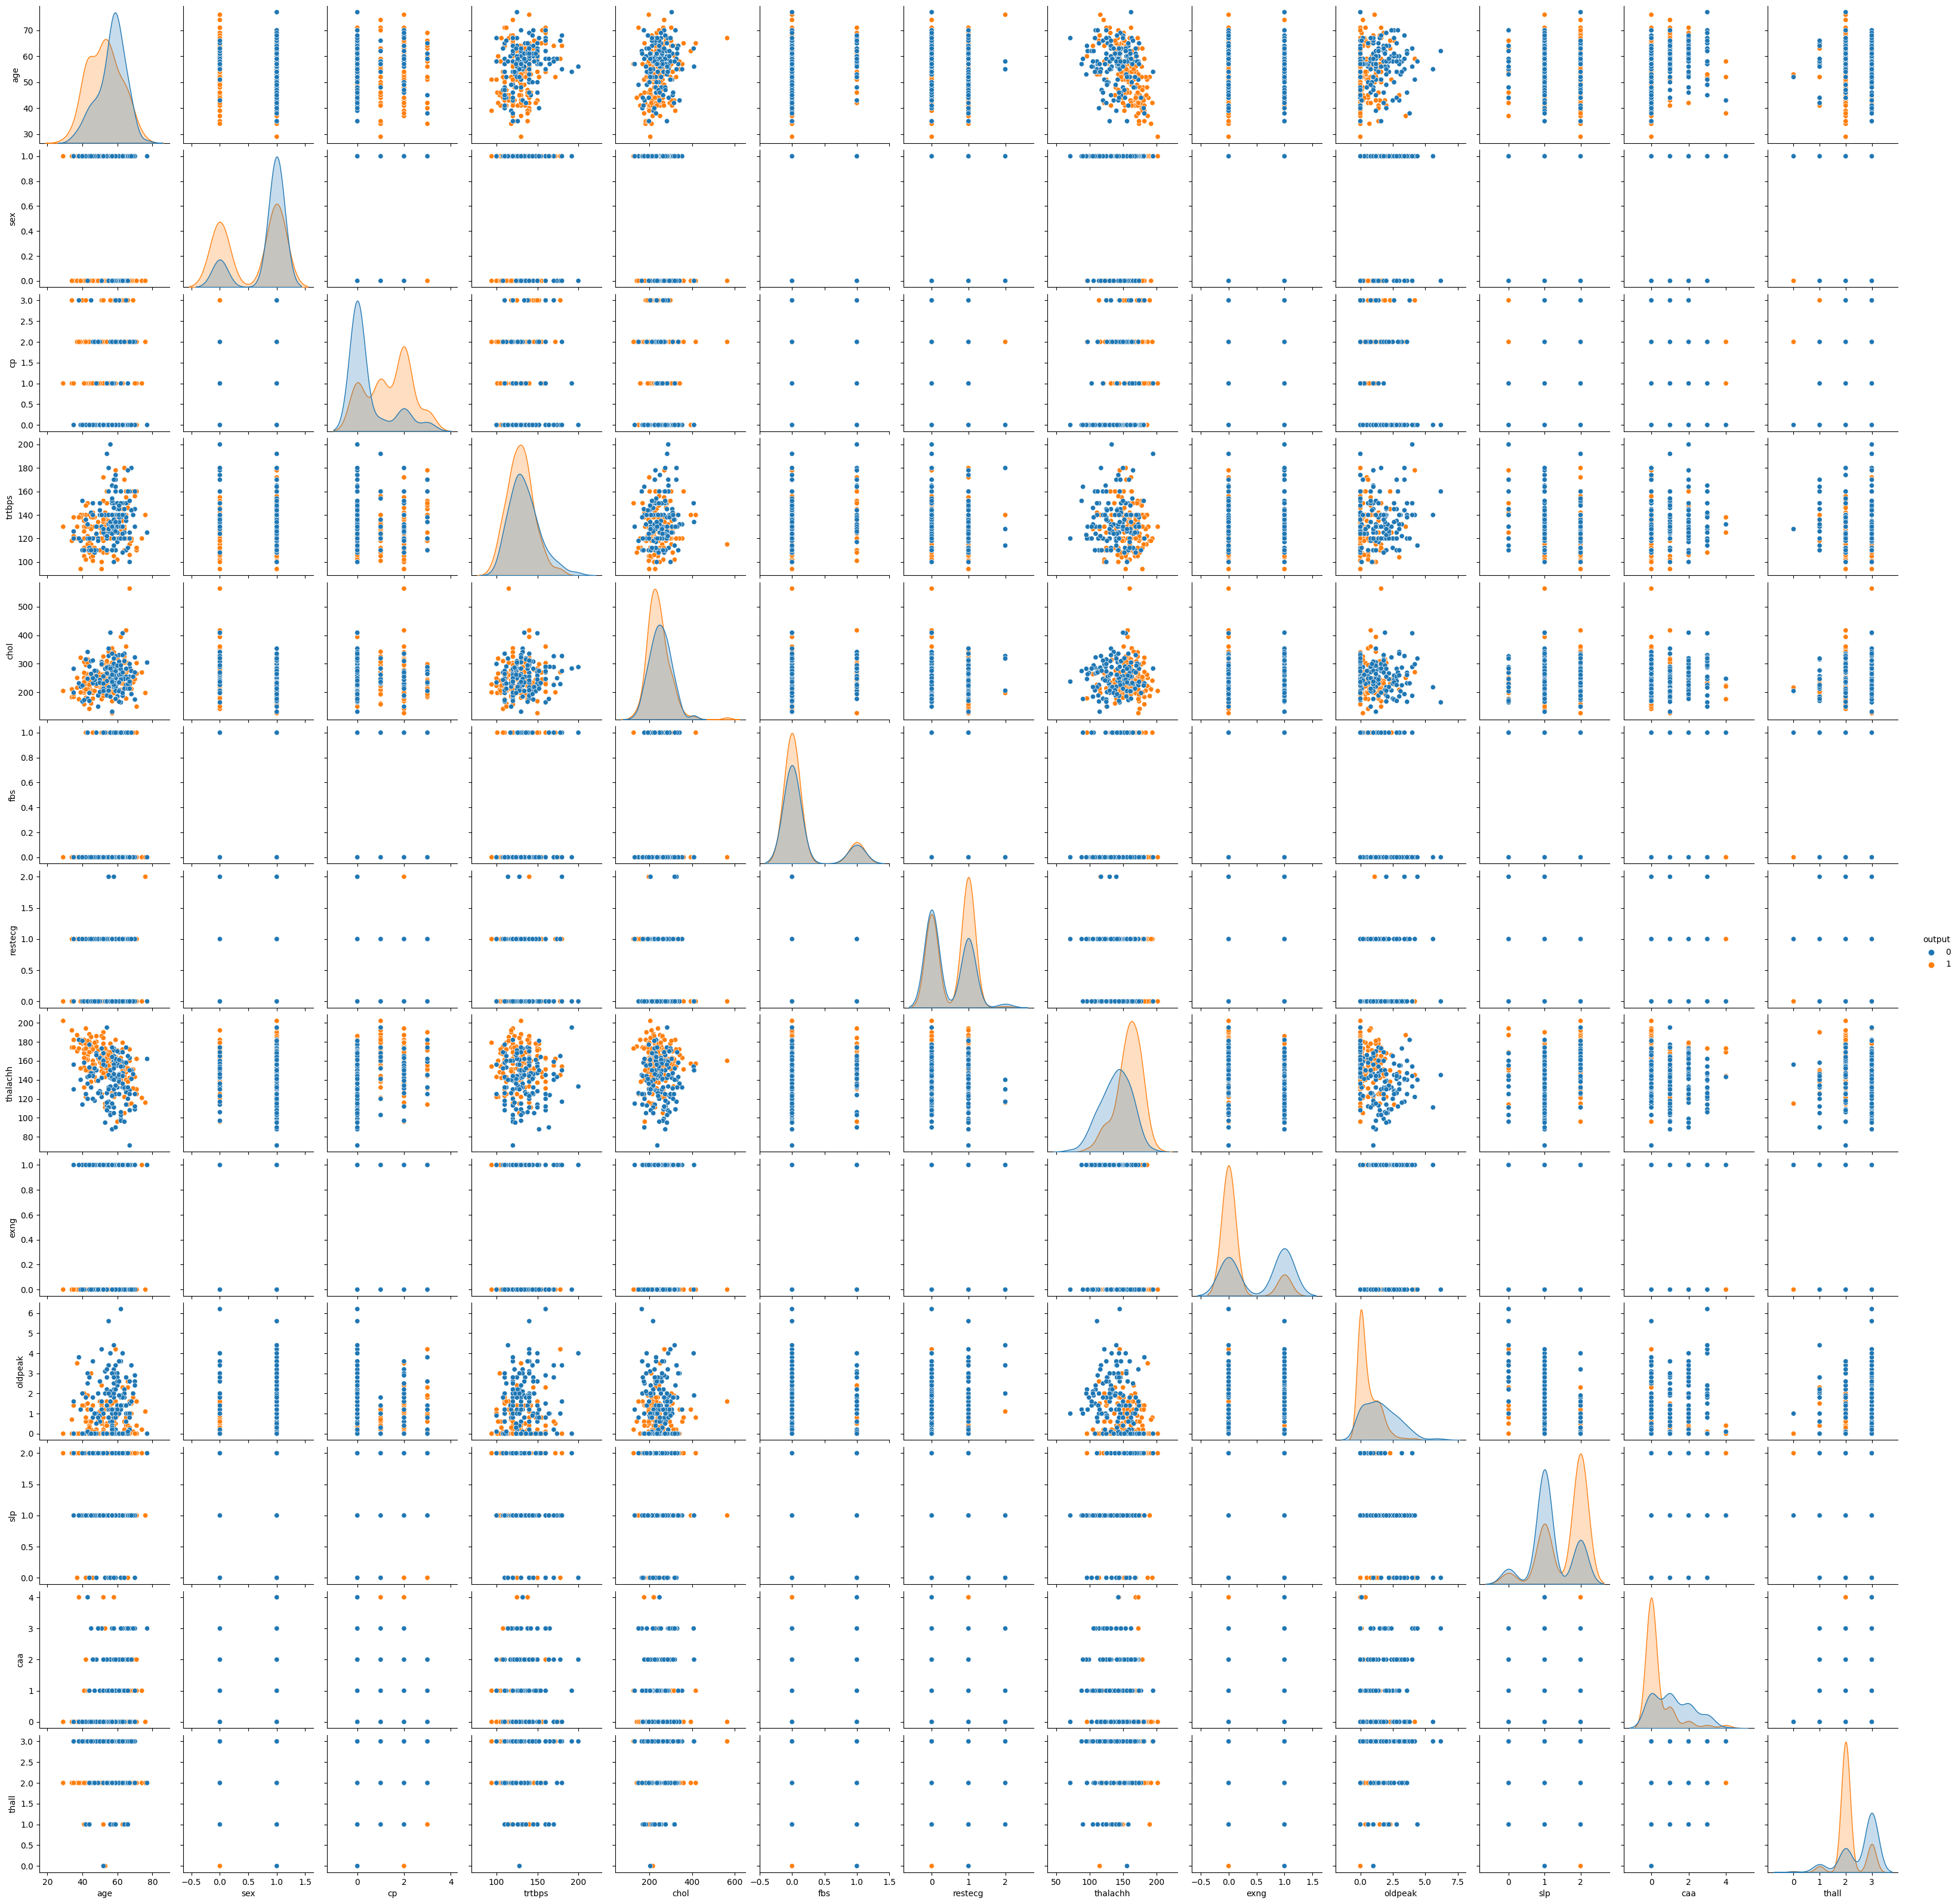

In [169]:
#Multivariate EDA
plt.figure(1, figsize=(15,8))
sns.pairplot(df, hue='output')
plt.show()

<Axes: >

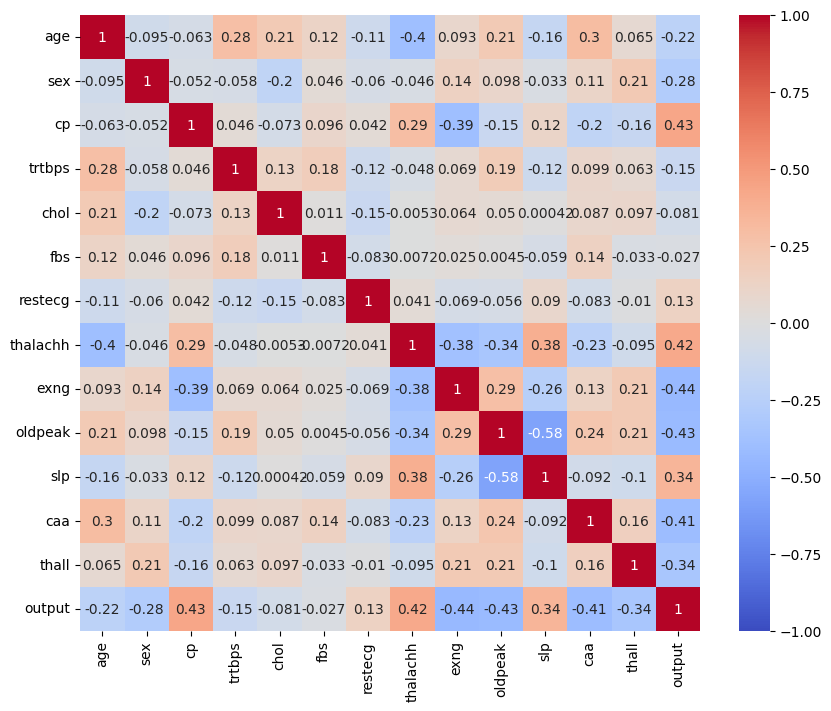

In [170]:
#Multivariate EDA
corr_matrix=df.corr()
plt.figure(1, figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, vmin=-1, vmax=1)

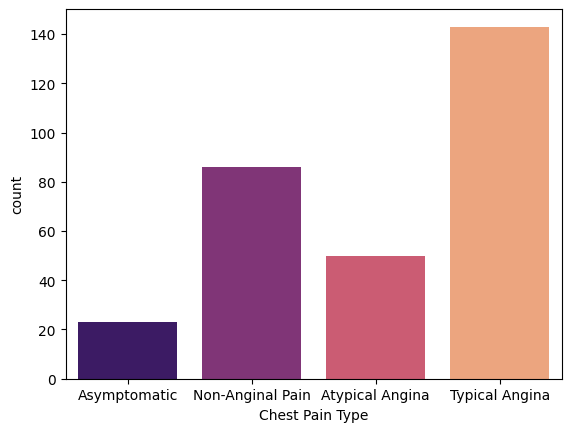

In [173]:

sns.countplot(x='Chest Pain Type', data=df, palette='magma')
plt.show()

- People have chest pain type typical angina is the highest
- People have chest pain type asymptomatic is the lowest
- People have chest pain type typical angina almost 50% of all the people on this dataset (dominated by typical angina)

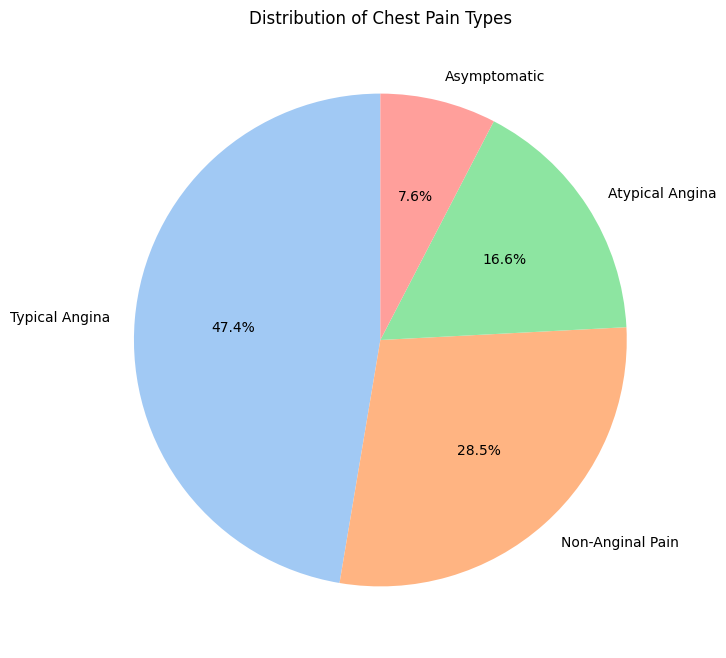

In [174]:
cp_counts = df['Chest Pain Type'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(cp_counts, labels=cp_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Chest Pain Types')
plt.show()

- Percentage people have chest pain type typical angina is the highest
- Percentage people have chest pain type asymptomatic is the lowest
- Percentage people have chest pain type typical angina almost 50% of all the people on this dataset (dominated by typical angina)

# Comparison

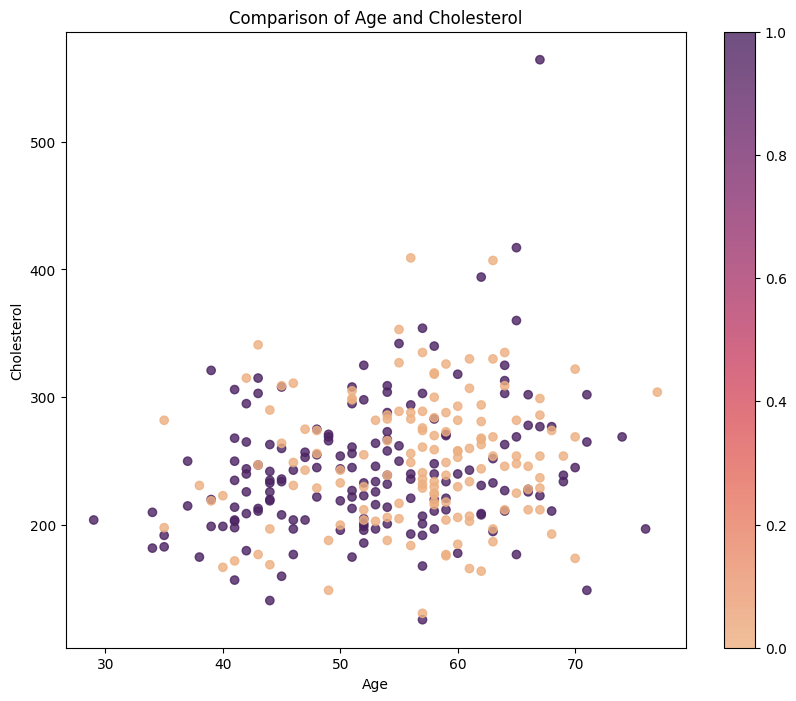

In [175]:
plt.figure(figsize=(10, 8))

plt.scatter(df['age'], df['chol'], c=df['output'], alpha=0.8, cmap='flare')

plt.title('Comparison of Age and Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.colorbar()
plt.show()

- People at range age 40-50 y.o have more chance of heart attack because the dark purple color stacked at that range of age
- People at range age 50-60 y.o have low chance of heart attack because the cream color stacked at that range of age


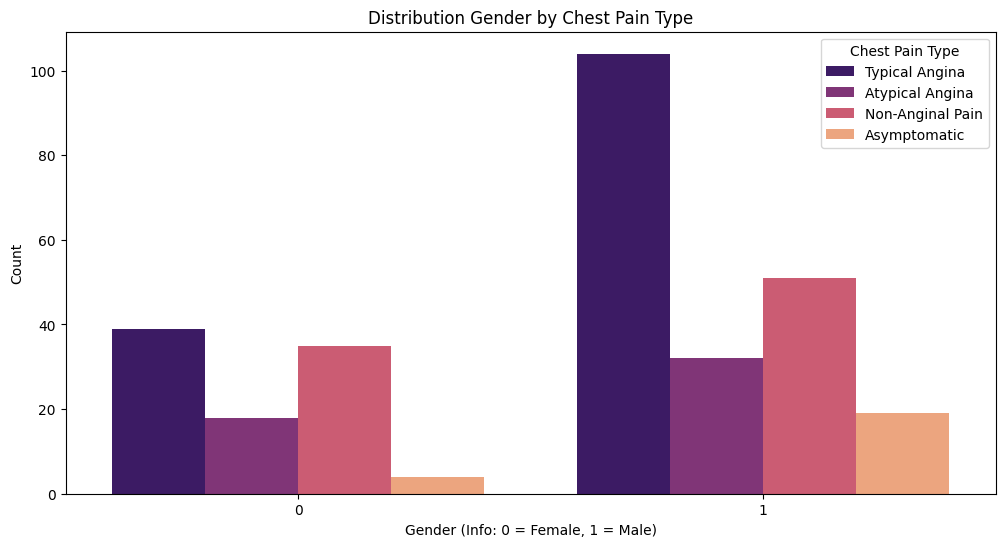

In [176]:
item = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
plt.figure(figsize=(12, 6))

sns.countplot(x='sex', hue='cp', data=df, palette='magma')

plt.title('Distribution Gender by Chest Pain Type')
plt.xlabel('Gender (Info: 0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right', labels=item)

plt.show()

- People with gender male have a bigger risk of getting typical angina
- People with gender female have a bigger risk of getting typical angna and non-anginal pain because the gap between two feature are close to each other

<Figure size 1200x600 with 0 Axes>

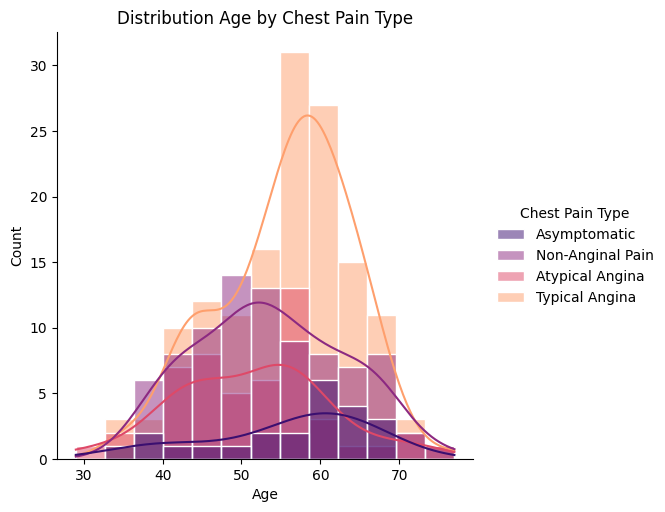

In [177]:
item = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
plt.figure(figsize=(12, 6))

sns.displot(x='age', hue='Chest Pain Type', data=df, palette='magma', kde = True, edgecolor='white', alpha=.5)

plt.title('Distribution Age by Chest Pain Type')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

- People that have typical angina are dominated by people at range age 50-60 y.o
- People that have non-anginal pain are dominated by people at range age 50 y.o
- People that have atypical angina pain are dominated by people at range age 50-60 y.o
- People that have asymptomatic are dominated by people at range age 60 y.o
- Conclusion: Therefore, people at range 50-60 y.o have bigger risk to get chest pain type 




# Classification

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(['output', 'Chest Pain Type'], axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [179]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\KENT LEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

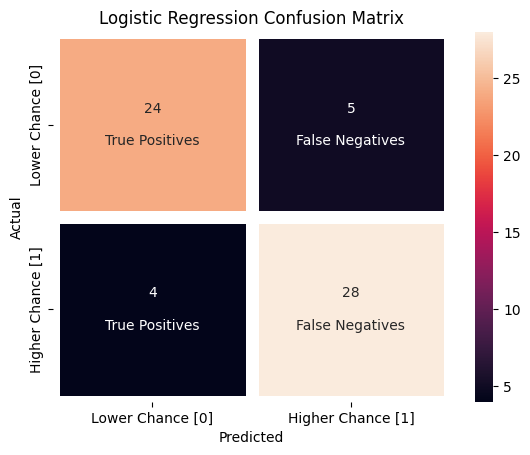

Accuracy Logistic Regression: 0.8524590163934426


In [219]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["Lower Chance [0]" , "Higher Chance [1]"]

ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Logistic Regression Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Logistic Regression: {accuracy}')
lr_test_acc = accuracy_score(y_test, y_pred)

In [188]:
knn = KNeighborsClassifier(n_neighbors = 5, metric="euclidean", p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

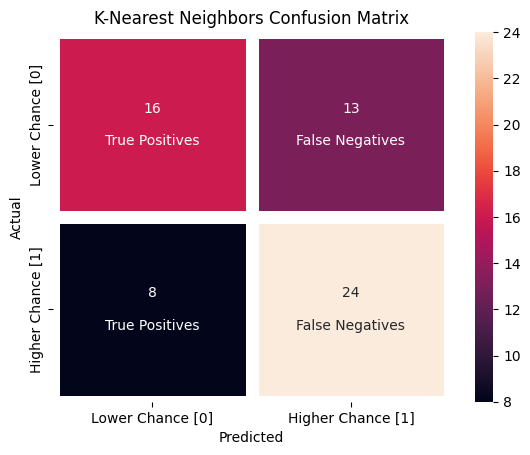

Accuracy KNN: 0.6557377049180327


In [218]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["Lower Chance [0]" , "Higher Chance [1]"]

ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy KNN: {accuracy}')
knn_test_acc = accuracy_score(y_test, y_pred)

In [193]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

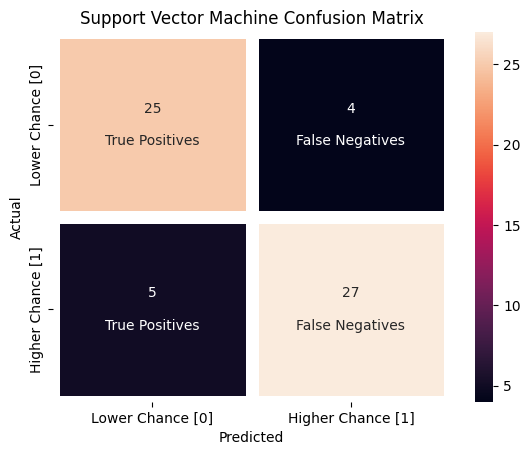

Accuracy SVM: 0.8524590163934426


In [217]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["Lower Chance [0]" , "Higher Chance [1]"]

ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy SVM: {accuracy}')
svm_test_acc = accuracy_score(y_test, y_pred)

In [195]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

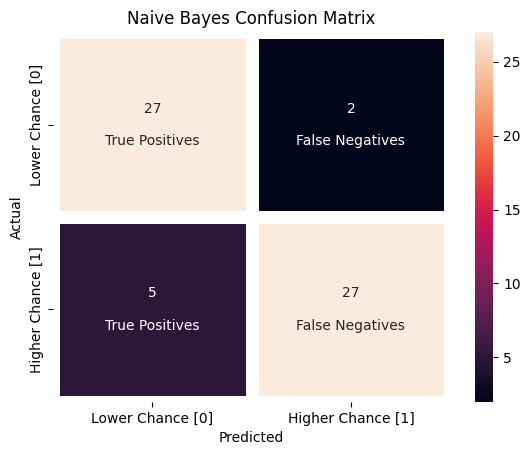

Accuracy Naive Bayes: 0.8852459016393442


In [216]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["Lower Chance [0]" , "Higher Chance [1]"]

ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Naive Bayes Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Naive Bayes: {accuracy}')
nb_test_acc = accuracy_score(y_test, y_pred)

In [199]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

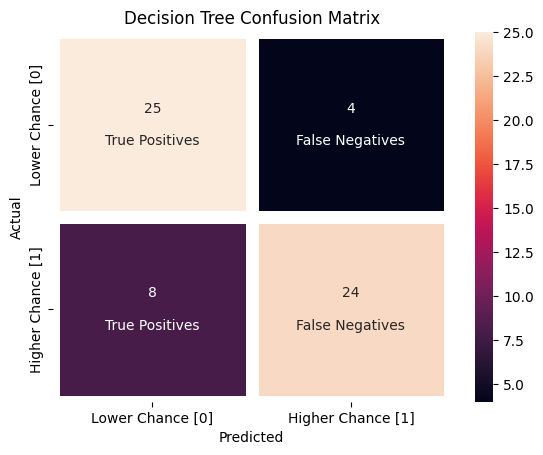

Accuracy DT: 0.8032786885245902


In [215]:
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["Lower Chance [0]" , "Higher Chance [1]"]

ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Decision Tree Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy DT: {accuracy}')
tree_test_acc = accuracy_score(y_test, y_pred)

In [203]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

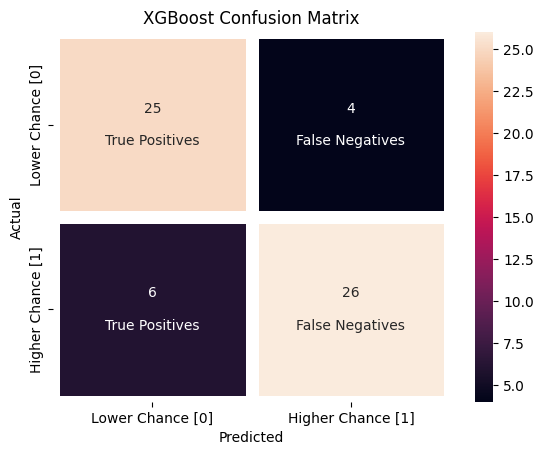

Accuracy XGBoost: 0.8360655737704918


In [213]:
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["Lower Chance [0]" , "Higher Chance [1]"]

ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('XGBoost Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy XGBoost: {accuracy}')
xgb_test_acc = accuracy_score(y_test, y_pred)

In [206]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

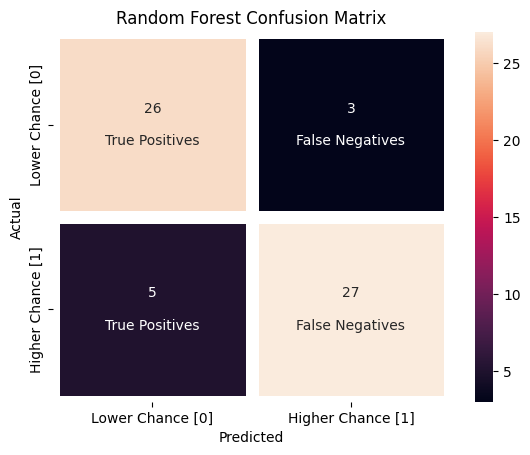

Accuracy Random Forest: 0.8688524590163934


In [214]:
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = np.array([[f'{i}\n\n{j}' for i, j in zip(row, label)] for row in cm])
status = ["Lower Chance [0]" , "Higher Chance [1]"]

ax = sns.heatmap(cm, annot=annot, fmt='', linecolor='white', linewidths=8 ,xticklabels=status, yticklabels=status)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Random Forest Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Random Forest: {accuracy}')
rdm_test_acc = accuracy_score(y_test, y_pred)

In [221]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K-Nearest Neighbors','Support Vector Machines',
        'XGBoost', 'Gaussian Naive Bayes','Decision Tree',
        'Random Forest'
    ],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,svm_test_acc,xgb_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc
    ]
})

In [222]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Model Accuracy Score
4,Gaussian Naive Bayes,0.885246
6,Random Forest,0.868852
0,Logistic Regression,0.852459
2,Support Vector Machines,0.852459
3,XGBoost,0.836066
5,Decision Tree,0.803279
1,K-Nearest Neighbors,0.655738


# Kesimpulan
- Accuracy score terendah terdapat pada model KNN yaitu 0.65 dan tertinggi pada model Naive Bayes yaitu 0.88
- Kedua model yaitu Logistic Regression dan SVM memiliki accuracy score yang sama yaitu 0.85
- Berdasarkan hasil pemodelan, maka saya akan memilih untuk menggunakan Logistic Regressio atau SVM dalam melakukan prediksi heart disease ini dikarenakan kedua accuracy score memiliki nilai yang sama